<a href="https://colab.research.google.com/github/PawinData/UC/blob/master/DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import str_to_day, day_to_str, check_missing

In [6]:
df = pd.read_csv('https://query.data.world/s/7ifvvpyy23sa2fciuvcygehakxlnnv')

# only look at California
df = df.loc[df["state"]=="California"]

# explore counties in California

count = dict()              # how many data instances in each county
for cnty in df["county"]:
    count[cnty] = count.get(cnty,0) + 1

sum = 0                    # count the number of counties in California
t = list(count.items())
t.sort()
for tp in t:
    print(tp)
    sum += 1
print("There are "+str(sum)+" counties in the dataset.")

print("California has 58 counties in total.")

('Alameda', 41)
('Alpine', 12)
('Amador', 22)
('Butte', 21)
('Calaveras', 18)
('Colusa', 15)
('Contra Costa', 39)
('Del Norte', 9)
('El Dorado', 21)
('Fresno', 35)
('Glenn', 14)
('Humboldt', 51)
('Imperial', 22)
('Inyo', 17)
('Kern', 25)
('Kings', 15)
('Lake', 5)
('Los Angeles', 76)
('Madera', 35)
('Marin', 45)
('Mendocino', 24)
('Merced', 18)
('Mono', 18)
('Monterey', 25)
('Napa', 45)
('Nevada', 26)
('Orange', 77)
('Placer', 40)
('Plumas', 11)
('Riverside', 35)
('Sacramento', 50)
('San Benito', 29)
('San Bernardino', 27)
('San Diego', 61)
('San Francisco', 69)
('San Joaquin', 32)
('San Luis Obispo', 28)
('San Mateo', 40)
('Santa Barbara', 27)
('Santa Clara', 71)
('Santa Cruz', 35)
('Shasta', 33)
('Siskiyou', 21)
('Solano', 47)
('Sonoma', 45)
('Stanislaus', 31)
('Sutter', 17)
('Tehama', 8)
('Tulare', 30)
('Tuolumne', 13)
('Unknown', 12)
('Ventura', 32)
('Yolo', 36)
('Yuba', 21)
There are 54 counties in the dataset.
California has 58 counties in total.


In [7]:
# only look at the 10 counties in LA-centered South California
COUNTIES = ['San Luis Obispo', 'Kern', 'San Bernardino', 'Santa Barbara', 'Ventura', 
            'Los Angeles', 'Orange', 'Riverside', 'San Diego', 'Imperial']
COUNTIES.sort()

DATA = pd.DataFrame(df.loc[df['county']==COUNTIES[0]], index=None)
for cnty in COUNTIES[1:]:
    DATA = DATA.append(df.loc[df["county"]==cnty], ignore_index=True)
        
print(DATA.shape)
DATA 

(410, 6)


,date,county,state,fips,cases,deaths
0,2020-03-20,Imperial,California,6025.0,4,0
1,2020-03-21,Imperial,California,6025.0,4,0
2,2020-03-22,Imperial,California,6025.0,4,0
3,2020-03-23,Imperial,California,6025.0,4,0
4,2020-03-24,Imperial,California,6025.0,9,0
...,...,...,...,...,...,...
405,2020-04-06,Ventura,California,6111.0,226,6
406,2020-04-07,Ventura,California,6111.0,243,6
407,2020-04-08,Ventura,California,6111.0,263,7
408,2020-04-09,Ventura,California,6111.0,274,7


In [0]:
# save the dataframe
DATA.to_csv ('Data_cleaned.csv', index=False, header=True) 

In [9]:
# find the time window of observation
t = list(DATA["date"])
t.sort()
print("The start of observation:", t[0])
print("The end of observation:", t[-1])

The start of observation: 2020-01-25
The end of observation: 2020-04-10


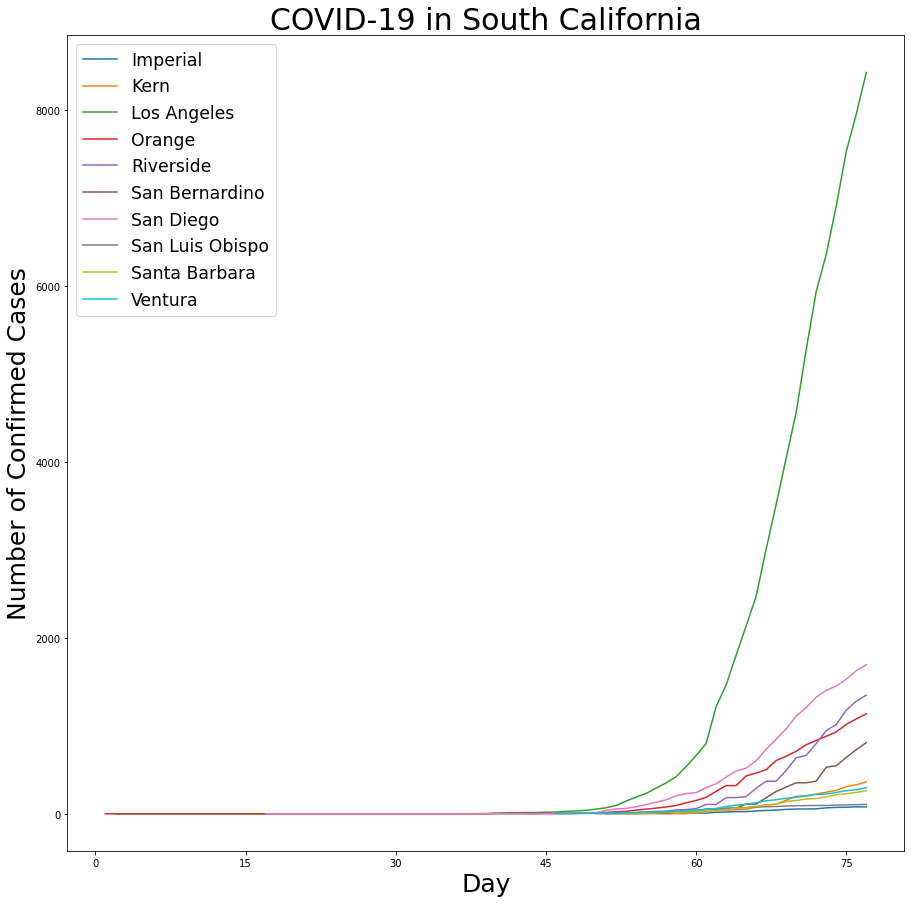

In [10]:
# plot the dynamics of confirmed cases for each county
plt.figure(figsize=(15,15))
for cnty in COUNTIES:
    data = DATA.loc[DATA["county"]==cnty]
    plt.plot([str_to_day(D) for D in data["date"]], data["cases"])
plt.xticks(np.arange(0,str_to_day(t[-1])-str_to_day(t[0])+1, step=15))
plt.title("COVID-19 in South California", fontsize=30)
plt.xlabel("Day", fontsize=25)
plt.ylabel("Number of Confirmed Cases", fontsize=25)
plt.legend(COUNTIES, loc="upper left", fontsize="xx-large")
plt.show()

# The results make sense intuitively. While the pandemic grows fastest in Los Angeles, Imperial and San Luis Obispo, two counties most distant to Los Angeles, have fewest confirmed cases of COVID-19. The presence of temporal-spatial correlations is very likely.

In [11]:
# check if the report of confirmed cases has been incessant in the counties
for cnty in COUNTIES:
    print(cnty, "has no missing data: ", check_missing(DATA.loc[DATA["county"]==cnty]["date"]))

Imperial has no missing data:  True
Kern has no missing data:  True
Los Angeles has no missing data:  True
Orange has no missing data:  True
Riverside has no missing data:  True
San Bernardino has no missing data:  True
San Diego has no missing data:  True
San Luis Obispo has no missing data:  True
Santa Barbara has no missing data:  True
Ventura has no missing data:  True


# For reasonable comparison, the number of daily new cases will be normalized by the population of each county.

In [12]:
# a dictionary to store the population for each county
population = dict()
for cnty in COUNTIES:
    pop = input("Type in the population of "+cnty+":")
    population[cnty] = int(pop)

Type in the population of Imperial:174528
Type in the population of Kern:839631
Type in the population of Los Angeles:10039107
Type in the population of Orange:3010232
Type in the population of Riverside:2470546
Type in the population of San Bernardino:2180085
Type in the population of San Diego:3338330
Type in the population of San Luis Obispo:269637
Type in the population of Santa Barbara:423895
Type in the population of Ventura:823318


In [0]:
# reorganize the data for the TCP framework
T = list()
D = dict()

for cnty in COUNTIES:
    data = DATA.loc[DATA["county"]==cnty]
    time = [str_to_day(dd) for dd in data["date"]]
    # record the date when the first case was confirmed in each county
    D[cnty] = time[0] 
    # number of cases per 1 million population   
    cases_count = [ele/(population[cnty]*0.1**6) for ele in data["cases"]]
    # focus on daily new cases rather than total case count
    cases_count = [cases_count[0]] + [cases_count[i]-cases_count[i-1] for i in range(1,len(cases_count))]
    if time[0]>1:
        cases_count = [0] * (time[0] - 1) + cases_count
    T.append(cases_count)

# construct an array
# each row is the time series of cases count for a county    
TimeSeries = np.array(T)

In [26]:
n_obs = str_to_day(t[-1])-str_to_day(t[0])+1

# save the array of daily new cases per 1 million population as a dataframe
DF = pd.DataFrame(TimeSeries, index=COUNTIES, columns=[day_to_str(dd) for dd in range(1,n_obs+1)])
DF.to_csv("Daily_New_Cases.csv", sep=",")

# display the first few columns of the dataframe for daily new cases
DF.loc[:,:"2020-02-02"]

,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02
Imperial,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kern,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Los Angeles,0.0000,0.09961,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Orange,0.3322,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Riverside,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
San Bernardino,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
San Diego,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
San Luis Obispo,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Santa Barbara,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ventura,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# display the last few columns of the dataframe
DF.loc[:,"2020-04-02":]

,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10
Imperial,40.108177,28.648698,0.000000,11.459479,63.027136,28.648698,11.459479,22.918959,0.000000
Kern,53.594972,52.403973,7.145996,23.819988,25.010987,25.010987,50.021974,25.010987,39.302980
Los Angeles,52.494709,51.897046,70.823032,66.041731,41.836390,54.785749,61.758481,42.334443,47.314965
Orange,16.610015,18.271017,24.915023,15.945615,15.945615,16.277815,28.237026,20.928619,19.599818
Riverside,49.381797,58.691480,10.928758,54.239022,59.501017,28.333818,65.977318,40.881651,28.333818
San Bernardino,22.934886,22.476188,0.000000,8.715257,72.474238,7.797861,43.117585,40.365399,37.154515
San Diego,35.047464,43.734442,29.056444,35.047464,23.364976,14.977549,22.765874,29.355995,20.369466
San Luis Obispo,22.252139,14.834759,0.000000,7.417380,0.000000,14.834759,11.126069,7.417380,11.126069
Santa Barbara,66.054094,30.667972,37.745196,14.154449,42.463346,61.335944,23.590748,35.386122,40.104271
Ventura,20.648158,14.575170,17.004365,21.862755,6.072988,20.648158,24.291950,13.360573,29.150340
